In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
import io
titanic_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
print(str(len(titanic_data.index)))  # total number of passengers


891


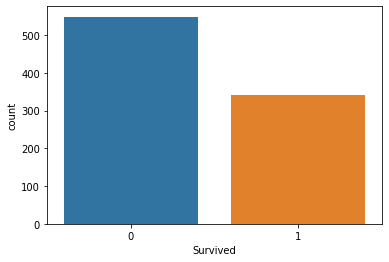

In [10]:
sns.countplot(x = "Survived",data = titanic_data)
# 0 = dead
# 1 = survived

In [17]:
#Data wrangling

titanic_data.drop("Cabin",axis = 1,inplace = True)  #dropping the cabin wala column bcz it contained a lot of NaN values and also the "cabin" info was v useless to us ! 





KeyError: ignored

In [22]:
#now dropping all Nan values in various columns

titanic_data.dropna(inplace = True)

titanic_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


In [24]:
print(str(len(titanic_data.index)))  # total number of passengers

#Now after cleaning our data , ie removing first the cabin column , and then the data rows which have NaN  , we shrinked our data from 891 to 712

712


In [27]:
# only keeping male , ie 
# male = 0  , mtlb woh female hai ... if male = 1, toh woh male hai
#doing this so that we reduce our number of variables

sex = pd.get_dummies(titanic_data['Sex'],drop_first = True)
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [28]:
embark = pd.get_dummies(titanic_data["Embarked"],drop_first = True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
Pcl = pd.get_dummies(titanic_data["Pclass"],drop_first = True)
Pcl.head(15)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
6,0,0
7,0,1
8,0,1
9,1,0
10,0,1


In [33]:
titanic_data = pd.concat([titanic_data , sex, embark , Pcl] , axis = 1)
titanic_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1,1,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,0,0,1,0,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1,0,1,1,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1,0,1,0,0,1,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,1,0,0,0,0,1,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1,0,1,0,0,1,0,1


In [37]:
titanic_data.drop(['Sex' , "Embarked" , "PassengerId" , "Name" , "Ticket"],axis = 1,inplace = True)


In [38]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1


In [40]:
titanic_data.drop("Pclass" ,axis = 1, inplace = True)

In [42]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1


In [44]:
#Training my data


X = titanic_data.drop("Survived", axis = 1)  #my independent features except the survived 
# wahi toh predict krna hai 


y = titanic_data['Survived'] # our prediciton would be based on training our model , so basically 
# y is our output 


In [ ]:
from sklearn.cross_validation import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 1)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()







